In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from tabulate import tabulate

2025-03-10 09:51:15.754381: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-10 09:51:16.341386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#Ejercicio 1.A
iris=load_iris()

longitudes_petalos=iris.data[0:99,2]
anchos_petalos=iris.data[0:99,3]
flower_type=iris.target[0:99]
 
x=np.column_stack((longitudes_petalos,anchos_petalos))
y=flower_type


np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy')


model.fit(x, y,epochs=100,verbose=False)

y_score_a=model.predict(np.array([[1.3,0.3]]),verbose=False)
if (y_score_a<=0.5):
    y_pred_a=0
else:
    y_pred_a=1

y_score_b=model.predict(np.array([[3.9,1.2]]),verbose=False)
if (y_score_b<=0.5):
    y_pred_b=0
else:
    y_pred_b=1

datos=[  
    [1.3,0.3,y_score_a,y_pred_a,0], 
    [3.9,1.2,y_score_b,y_pred_b,1]
]
 
 
print(tabulate(datos, headers=["Largo Pétalo","Ancho Pétalo","Score Flor Predicha (y_score)","Valor Flor Predicha(y_pred)","Valor Flor Real(y_true)"]))


/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-10 09:51:17.316686: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-10 09:51:17.354618: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.

  Largo Pétalo    Ancho Pétalo    Score Flor Predicha (y_score)    Valor Flor Predicha(y_pred)    Valor Flor Real(y_true)
--------------  --------------  -------------------------------  -----------------------------  -------------------------
           1.3             0.3                         0.167054                              0                          0
           3.9             1.2                         0.964128                              1                          1


 162/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step

/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*',)
  warnings.warn(


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 656us/step


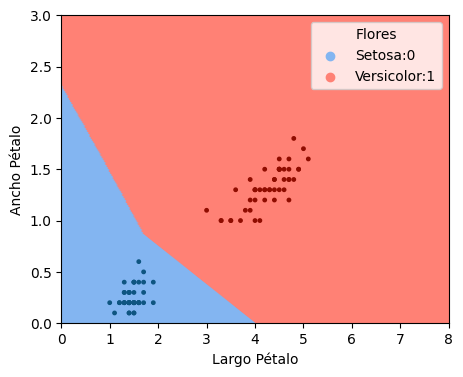

In [3]:
#Ejercicio 1.B

from matplotlib.colors import ListedColormap
figure=plt.figure(figsize = (5, 4))
axes = figure.add_subplot()
 
colors = ["#0E5581", "#8F0C00", "#0C8F00"] 
cmap = ListedColormap(colors[:len(np.unique(y))]) 
 
 
colors = ["#83B5F1", "#FF8175", "#75FF81"] 
cmap_fondo = ListedColormap(colors[:len(np.unique(y))]) 
 
 
xt=np.linspace(0,8,300)
yt=np.linspace(0,3,300)
xt,yt=np.meshgrid(xt,yt)
 
xa=xt.reshape(-1)
ya=yt.reshape(-1)
 
xya=np.column_stack((xa,ya))
 
za=model.predict([xya])
 
zt=np.reshape(za,xt.shape)
 
 
scatter=axes.scatter(x=xa, y=ya, c=za, cmap=cmap_fondo,s=6)
axes.set_xlabel('Largo Pétalo')  
axes.set_ylabel('Ancho Pétalo')
 
for i, name in enumerate(["Setosa","Versicolor"]):
    color = scatter.cmap(scatter.norm(i)) 
    axes.scatter([], [], color=[color], label=name+":"+str(i)) 
scatter=axes.scatter(x=x[:,0], y=x[:,1], c=y, cmap=cmap,s=6)
axes.set_xlim(xmin=0,xmax=8)
axes.set_ylim(ymin=0,ymax=3)
axes.legend(title="Flores")

In [4]:
#Ejercicio 2.A

iris=load_iris()

longitudes_petalos=iris.data[0:99,2]
anchos_petalos=iris.data[0:99,3]
flower_type=iris.target[0:99]
 
x=np.column_stack((longitudes_petalos,anchos_petalos))
y=flower_type



np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model=Sequential()
model.add(Dense(4, activation='relu',input_dim=2))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy')


model.fit(x, y,epochs=30,verbose=False)




y_score_a=model.predict(np.array([[1.3,0.3]]),verbose=False)
if (y_score_a<=0.5):
    y_pred_a=0
else:
    y_pred_a=1

y_score_b=model.predict(np.array([[3.9,1.2]]),verbose=False)
if (y_score_b<=0.5):
    y_pred_b=0
else:
    y_pred_b=1

datos=[  
    [1.3,0.3,y_score_a,y_pred_a,0], 
    [3.9,1.2,y_score_b,y_pred_b,1]
]
print(tabulate(datos, headers=["Largo Pétalo","Ancho Pétalo","Score Flor Predicha (y_score)","Valor Flor Predicha(y_pred)","Valor Flor Real(y_true)"]))



  Largo Pétalo    Ancho Pétalo    Score Flor Predicha (y_score)    Valor Flor Predicha(y_pred)    Valor Flor Real(y_true)
--------------  --------------  -------------------------------  -----------------------------  -------------------------
           1.3             0.3                         0.552505                              1                          0
           3.9             1.2                         0.7109                                1                          1


 171/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step

/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_11. Received: the structure of inputs=('*',)
  warnings.warn(


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step


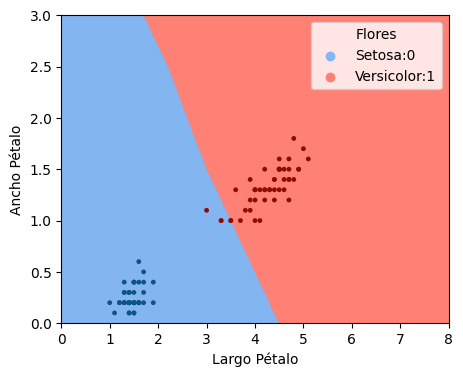

In [5]:
#Ejercicio 2.B 

from matplotlib.colors import ListedColormap
figure=plt.figure(figsize = (5, 4))
axes = figure.add_subplot()
 
colors = ["#0E5581", "#8F0C00", "#0C8F00"] 
cmap = ListedColormap(colors[:len(np.unique(y))]) 
 
 
colors = ["#83B5F1", "#FF8175", "#75FF81"] 
cmap_fondo = ListedColormap(colors[:len(np.unique(y))]) 
 
 
xt=np.linspace(0,8,300)
yt=np.linspace(0,3,300)
xt,yt=np.meshgrid(xt,yt)
 
xa=xt.reshape(-1)
ya=yt.reshape(-1)
 
xya=np.column_stack((xa,ya))
 
za=model.predict([xya])
 
zt=np.reshape(za,xt.shape)
 
 
scatter=axes.scatter(x=xa, y=ya, c=za, cmap=cmap_fondo,s=6)
axes.set_xlabel('Largo Pétalo')  
axes.set_ylabel('Ancho Pétalo')
 
for i, name in enumerate(["Setosa","Versicolor"]):
    color = scatter.cmap(scatter.norm(i)) 
    axes.scatter([], [], color=[color], label=name+":"+str(i)) 
scatter=axes.scatter(x=x[:,0], y=x[:,1], c=y, cmap=cmap,s=6)
axes.set_xlim(xmin=0,xmax=8)
axes.set_ylim(ymin=0,ymax=3)
axes.legend(title="Flores")

  Largo Pétalo    Ancho Pétalo    Score Flor Predicha (y_score)    Valor Flor Predicha(y_pred)    Valor Flor Real(y_true)
--------------  --------------  -------------------------------  -----------------------------  -------------------------
           5.1             1.5                         0.999998                              1                          2
           5.8             2.2                         1                                     1                          2


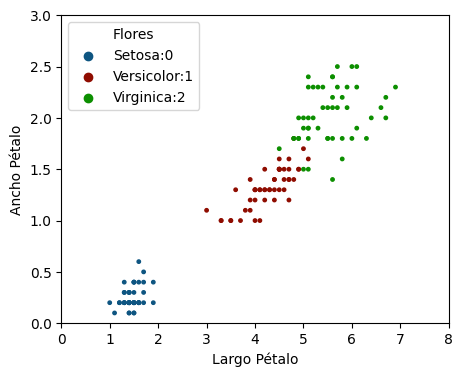

In [6]:
#Ejercicio 3
iris=load_iris()

longitudes_petalos=iris.data[:,2]
anchos_petalos=iris.data[:,3]
flower_type=iris.target[:]
 
x=np.column_stack((longitudes_petalos,anchos_petalos))
y=flower_type



np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy')


model.fit(x, y,epochs=40,verbose=False)

from matplotlib.colors import ListedColormap
figure=plt.figure(figsize = (5, 4))
axes = figure.add_subplot()
 
colors = ["#0E5581", "#8F0C00", "#0C8F00"]  
cmap = ListedColormap(colors[:len(np.unique(y))]) 
 
 
scatter=axes.scatter(x=x[:,0], y=x[:,1], c=y, cmap=cmap,s=6)
axes.set_xlabel('Largo Pétalo')  
axes.set_ylabel('Ancho Pétalo')
 
for i, name in enumerate(["Setosa","Versicolor","Virginica"]):
    color = scatter.cmap(scatter.norm(i)) 
    axes.scatter([], [], color=[color], label=name+":"+str(i))  
 
axes.set_xlim(xmin=0,xmax=8)
axes.set_ylim(ymin=0,ymax=3)
axes.legend(title="Flores")


y_score_a=model.predict(np.array([[5.1, 1.5]]),verbose=False)
if (y_score_a<0.5):
    y_pred_a=0
elif y_score_a>1:
    y_pred_a=2
else:
    y_pred_a=1

y_score_b=model.predict(np.array([[5.8, 2.2]]),verbose=False)
if (y_score_b<0.5):
    y_pred_b=0
elif y_score_b>1:
    y_pred_b=2
else:
    y_pred_b=1

datos=[  
    [5.1, 1.5,y_score_a,y_pred_a,2], 
    [5.8, 2.2,y_score_b,y_pred_b,2]
]
 
 
print(tabulate(datos, headers=["Largo Pétalo","Ancho Pétalo","Score Flor Predicha (y_score)","Valor Flor Predicha(y_pred)","Valor Flor Real(y_true)"]))







In [7]:
#Ejercicio 4

#Problema 1: Saber si una foto es una cara
#Problema 2: Detectar si en una radiografía hay una fractura
#Problema 3: Saber si va a llover al día siguiente

In [8]:
#Ejercicio 5

from sklearn.datasets import load_breast_cancer
 
breast_cancer=load_breast_cancer()
 
x=breast_cancer.data
y=breast_cancer.target

np.set_printoptions(suppress=True)
print(x[56],y[56])
print(x[204],y[204])

np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model=Sequential()
model.add(Dense(30, activation='relu',input_dim=30))
model.add(Dense(60, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy')


model.fit(x, y,epochs=40,verbose=False)

y_score_a=model.predict(np.array(x[56:57,:]),verbose=False)
if (y_score_a<=0.5):
    y_pred_a=0
else:
    y_pred_a=1

y_score_b=model.predict(np.array(x[204:205,:]),verbose=False)
if (y_score_b<=0.5):
    y_pred_b=0
else:
    y_pred_b=1

datos=[  
    [56,y_score_a,y_pred_a,0], 
    [204,y_score_b,y_pred_b,1]
]
print(tabulate(datos, headers=["Fila Datos","Score Flor Predicha (y_score)","Valor Flor Predicha(y_pred)","Valor Flor Real(y_true)"]))


np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model=Sequential()
model.add(Dense(6, activation='relu',input_dim=30))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy')


model.fit(x, y,epochs=40,verbose=False)

y_score_a=model.predict(np.array(x[56:57,:]),verbose=False)
if (y_score_a<=0.5):
    y_pred_a=0
else:
    y_pred_a=1

y_score_b=model.predict(np.array(x[204:205,:]),verbose=False)
if (y_score_b<=0.5):
    y_pred_b=0
else:
    y_pred_b=1

datos=[  
    [56,y_score_a,y_pred_a,0], 
    [204,y_score_b,y_pred_b,1]
]
print(tabulate(datos, headers=["Fila Datos","Score Flor Predicha (y_score)","Valor Flor Predicha(y_pred)","Valor Flor Real(y_true)"]))








[  19.21       18.57      125.5      1152.          0.1053      0.1267
    0.1323      0.08994     0.1917      0.05961     0.7275      1.193
    4.837     102.5         0.006458    0.02306     0.02945     0.01538
    0.01852     0.002608   26.14       28.14      170.1      2145.
    0.1624      0.3511      0.3879      0.2091      0.3537      0.08294 ] 0
[ 12.47      18.6       81.09     481.9        0.09965    0.1058
   0.08005    0.03821    0.1925     0.06373    0.3961     1.044
   2.497     30.29       0.006953   0.01911    0.02701    0.01037
   0.01782    0.003586  14.97      24.64      96.05     677.9
   0.1426     0.2378     0.2671     0.1015     0.3014     0.0875  ] 1


/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/tabulate/__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


  Fila Datos    Score Flor Predicha (y_score)    Valor Flor Predicha(y_pred)    Valor Flor Real(y_true)
------------  -------------------------------  -----------------------------  -------------------------
          56                      3.21248e-12                              0                          0
         204                      0.476836                                 0                          1
  Fila Datos    Score Flor Predicha (y_score)    Valor Flor Predicha(y_pred)    Valor Flor Real(y_true)
------------  -------------------------------  -----------------------------  -------------------------
          56                      3.38831e-06                              0                          0
         204                      0.492738                                 0                          1


In [9]:
#Ejercicio 6
np.random.seed(6)
tf.random.set_seed(6)
random.seed(6)

model=Sequential()
model.add(Dense(6, activation='relu',input_dim=30))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy')


model.fit(x, y,epochs=40,verbose=False)

y_score_a=model.predict(np.array(x[56:57,:]),verbose=False)
if (y_score_a<=0.5):
    y_pred_a=0
else:
    y_pred_a=1

y_score_b=model.predict(np.array(x[204:205,:]),verbose=False)
if (y_score_b<=0.5):
    y_pred_b=0
else:
    y_pred_b=1

datos=[  
    [56,y_score_a,y_pred_a,0], 
    [204,y_score_b,y_pred_b,1]
]
print(tabulate(datos, headers=["Fila Datos","Score Flor Predicha (y_score)","Valor Flor Predicha(y_pred)","Valor Flor Real(y_true)"]))


np.random.seed(88)
tf.random.set_seed(88)
random.seed(88)

model=Sequential()
model.add(Dense(6, activation='relu',input_dim=30))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy')


model.fit(x, y,epochs=40,verbose=False)

y_score_a=model.predict(np.array(x[56:57,:]),verbose=False)
if (y_score_a<=0.5):
    y_pred_a=0
else:
    y_pred_a=1

y_score_b=model.predict(np.array(x[204:205,:]),verbose=False)
if (y_score_b<=0.5):
    y_pred_b=0
else:
    y_pred_b=1

datos=[  
    [56,y_score_a,y_pred_a,0], 
    [204,y_score_b,y_pred_b,1]
]
print(tabulate(datos, headers=["Fila Datos","Score Flor Predicha (y_score)","Valor Flor Predicha(y_pred)","Valor Flor Real(y_true)"]))



  Fila Datos    Score Flor Predicha (y_score)    Valor Flor Predicha(y_pred)    Valor Flor Real(y_true)
------------  -------------------------------  -----------------------------  -------------------------
          56                      2.35421e-13                              0                          0
         204                      0.400019                                 0                          1
  Fila Datos    Score Flor Predicha (y_score)    Valor Flor Predicha(y_pred)    Valor Flor Real(y_true)
------------  -------------------------------  -----------------------------  -------------------------
          56                         0.362648                              0                          0
         204                         0.714481                              1                          1
